In [1]:
import Pkg
Pkg.activate("../../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using Revise
using LinearAlgebra
using Distributions
using Random
using StatsPlots
using PDMats
using StatsBase
using Base.Iterators
using DataFrames, TimeSeries, XLSX
using PrettyTables

In [3]:
includet("../VARs/utils.jl")
includet("../VARs/VAR_OLS.jl")

In [385]:
df = DataFrame(XLSX.readtable("../../data/usa_macro_data.xlsx", "Quarterly", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :observation_date), Dates.year, first)

display(returns_summarystats(data_source, 1)) 

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,15078.0,67981.0,39458.2,53692.0,17636.0,0.1715,26286.5,0.9585,-1.2503,2.6169,38905.0
GDPDEF,33.2392,124.163,55.5963,83.761,13.42,0.2226,20.5978,0.9569,-1.2157,1.6726,55.2795
TB3MS,3.169,14.39,4.1599,5.705,0.03,0.9892,1.75,0.8736,1.2373,1.3127,3.89
GS10,2.8998,14.29,5.4985,7.3125,1.32,0.9367,3.445,0.9292,0.5291,1.8961,4.725
Price_10Y,1696.97,5318.51,1572.47,2695.96,103.357,0.8485,165.936,0.9684,-0.7847,0.9266,695.429
Stock_Price,1144.93,5011.96,854.949,1283.92,24.84,1.8757,92.205,0.8853,3.1229,0.7467,287.45
Dividend,18.0439,70.6511,16.4021,22.2008,1.4167,1.5142,3.1125,0.9253,1.3575,0.909,9.4
E,46.9804,197.883,39.1208,55.4942,2.4567,1.6771,5.735,0.8617,2.3112,0.8327,16.3017
CAPE,8.1611,42.1856,20.7752,26.3734,7.1818,0.4615,15.1749,0.8962,-0.3087,2.5456,20.4852


nothing

In [386]:
freq = 1

cpi = percentchange(data_source[:GDPDEF], :log) .* 100
gdp = percentchange(data_source[:A939RX0Q048SBEA], :log) .* 100
sr = (data_source[:TB3MS]) .- cpi
term = (data_source[:GS10]) .- (data_source[:TB3MS])
Δd = round.(percentchange(data_source[:Dividend], :log) .* 100, digits=2) .- cpi

dy = round.((log.(data_source[:Dividend]) .- log.(data_source[:Stock_Price])), digits=2)

data= merge(gdp, cpi, sr, term, Δd, dy)

start = Date(1985, 01,01)
end_d = Date(2024, 12, 31)
s_data = to(from(data, start),end_d)

display(returns_summarystats(s_data, freq)) 
display(cor(values(s_data)))



,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,1.54,3.58,1.7246,3.0028,-4.1876,-1.6545,0.981,0.3009,4.3411,1.1199,1.7824
GDPDEF,1.1531,6.7639,2.3429,2.5714,0.5552,1.7489,1.8625,0.5675,4.2844,2.0318,2.0163
TB3MS_GDPDEF,2.4664,4.7148,0.8791,3.0364,-6.4539,-0.3867,-0.7972,0.7299,0.101,0.3564,0.5763
GS10_TB3MS,1.224,3.61,1.6328,2.7025,-1.07,-0.2468,0.6675,0.491,-0.5856,1.3339,1.655
Dividend_GDPDEF,6.3915,14.4243,3.3838,7.4514,-23.0452,-1.6696,0.7085,0.4432,5.5506,0.5294,3.648
Dividend_Stock_Price,0.3321,-3.17,-3.8705,-3.5925,-4.42,0.3718,-4.1,0.7846,-0.8387,-11.6556,-3.925


nothing

6×6 Matrix{Float64}:
  1.0        0.186541    0.23559     -0.111771   0.163217    -0.180486
  0.186541   1.0        -0.101428    -0.237447   0.108673     0.0916719
  0.23559   -0.101428    1.0         -0.244165  -0.00978025   0.377249
 -0.111771  -0.237447   -0.244165     1.0       -0.294501     0.372277
  0.163217   0.108673   -0.00978025  -0.294501   1.0          0.0636524
 -0.180486   0.0916719   0.377249     0.372277   0.0636524    1.0

In [387]:
s_data

40×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 1985-01-01 to 2024-01-01
┌────────────┬─────────────────┬──────────┬──────────────┬────────────┬─────────
│            │ A939RX0Q048SBEA │ GDPDEF   │ TB3MS_GDPDEF │ GS10_TB3MS │ Divide ⋯
├────────────┼─────────────────┼──────────┼──────────────┼────────────┼─────────
│ 1985-01-01 │         3.57999 │  3.46524 │      4.71476 │        3.4 │        ⋯
│ 1986-01-01 │         3.14693 │  2.29697 │      4.60303 │       1.66 │        ⋯
│ 1987-01-01 │         1.78246 │  1.96793 │      3.57207 │       1.65 │        ⋯
│ 1988-01-01 │           3.251 │  3.01971 │      2.70029 │        2.7 │        ⋯
│ 1989-01-01 │         3.30513 │   4.0545 │       4.4855 │       0.67 │        ⋯
│ 1990-01-01 │         1.78235 │  3.57025 │      4.18975 │       0.66 │        ⋯
│ 1991-01-01 │        -2.28046 │  3.68325 │      2.33675 │        2.0 │        ⋯
│ 1992-01-01 │         1.50942 │  2.47236 │      1.41764 │       3.41 │        ⋯
│     ⋮      │        ⋮        │  

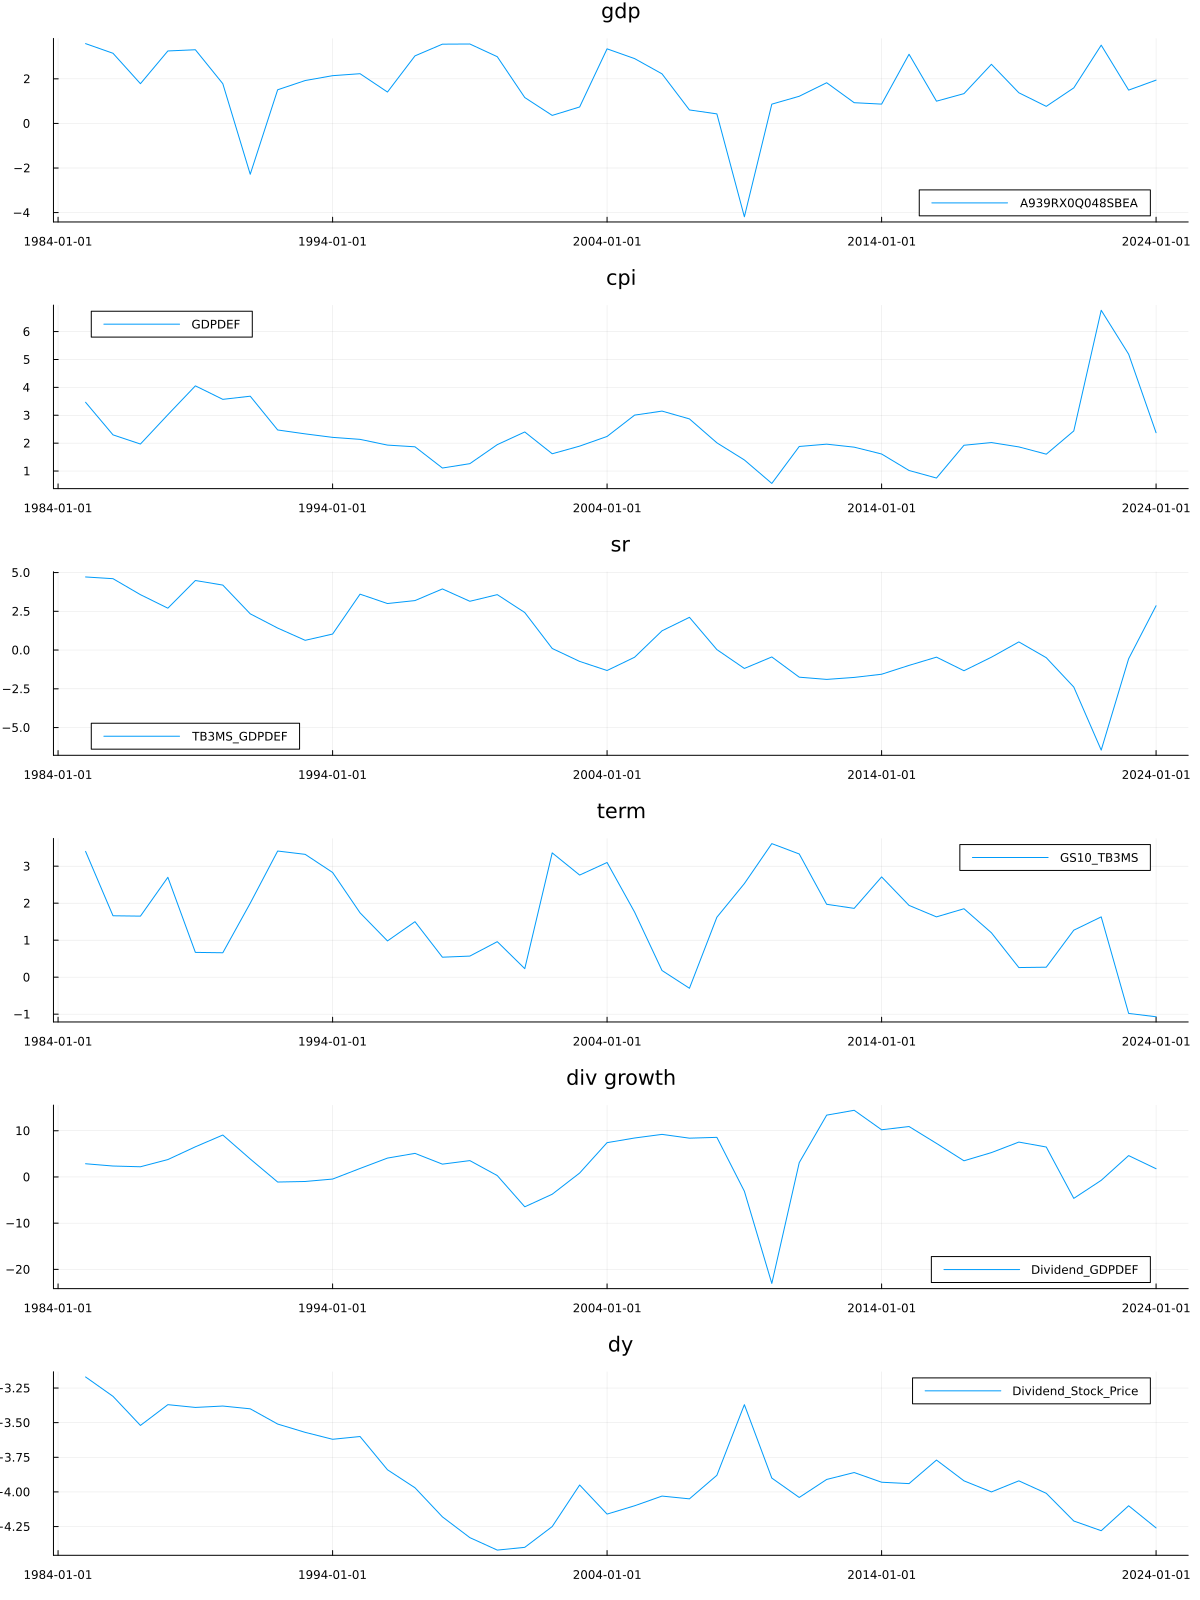

In [388]:
plot(s_data; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [389]:
assets_names = colnames(s_data)
T, n_assets = size(s_data)
model = VARModel(s_data)
model_summary(model)

,const,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price,std
A939RX0Q048SBEA,1.1308,0.3596,-0.0965,-0.0036,0.225,-0.0356,0.027,1.492
GDPDEF,3.5556,0.242,0.4588,-0.1355,-0.1397,-0.052,0.5709,0.9172
TB3MS_GDPDEF,-0.883,0.3001,0.6305,0.7316,0.2398,0.0275,0.3723,1.3337
GS10_TB3MS,1.5006,-0.4437,-0.2016,0.127,0.4997,-0.0086,-0.1024,0.6945
Dividend_GDPDEF,-5.9566,2.0129,-0.0226,-0.4696,1.0657,0.4293,-0.7905,5.0931
Dividend_Stock_Price,-1.5864,0.0014,0.0465,0.0147,0.0686,0.0088,0.6663,0.1593


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
A939RX0Q048SBEA,1.0,0.14,0.22,-0.25,0.09,-0.64
GDPDEF,0.14,1.0,-0.62,0.16,0.03,0.08
TB3MS_GDPDEF,0.22,-0.62,1.0,-0.53,-0.18,-0.29
GS10_TB3MS,-0.25,0.16,-0.53,1.0,0.12,0.39
Dividend_GDPDEF,0.09,0.03,-0.18,0.12,1.0,0.18
Dividend_Stock_Price,-0.64,0.08,-0.29,0.39,0.18,1.0


In [390]:
scenarios = simulate(model, 25*freq, 10_000)
#periods = [2,6, 16, 26]
periods = [1,5, 15, 25]
ret_in_years = cum_returns_in_periods(scenarios, periods, freq, true)
print_scenarios_summary(ret_in_years, assets_names, string.(periods))

for a in 1:n_assets
    print_scenarios_percentiles(ret_in_years[a, :, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), string.(assets_names[a]))
end  

,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,1.9428,2.3732,2.8568,-1.07,1.7768,-4.26
5,1.5563,2.2739,0.9447,0.7855,0.8648,-4.2746
15,1.5644,2.2887,0.1853,1.2063,2.6392,-4.145
25,1.5622,2.306,0.0714,1.2912,2.9073,-4.1076


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,0.0,0.0,0.0,0.0,0.0,0.0
5,0.717,0.6531,0.9517,0.6074,3.2908,0.1464
15,0.4318,0.4854,0.8405,0.4245,2.3253,0.1581
25,0.3402,0.3883,0.722,0.3443,1.8582,0.14


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,1.0,1.0,1.0,1.0,NaN,1.0
5,0.0266,-0.0279,0.0224,-0.0246,0.0207,-0.0282
15,0.0087,-0.0104,0.0235,-0.0176,0.0125,-0.019
25,-0.0074,0.0014,-0.0474,0.0149,0.0279,-0.0087


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,-2.0,-2.0,-2.0,-2.0,NaN,-2.0
5,0.0718,-0.0243,0.0239,-0.0154,-0.0068,0.0004
15,-0.0181,0.0591,-0.0039,0.0492,-0.0723,-0.0029
25,-0.0062,-0.0361,0.0009,0.0445,-0.0133,-0.0641


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428
5,-0.1114,0.1428,0.3799,1.0749,1.554,2.0348,2.7327,2.9904,3.2589
15,0.5619,0.7302,0.8556,1.2719,1.5661,1.8563,2.2752,2.4098,2.5815
25,0.7723,0.8946,1.0034,1.334,1.56,1.7949,2.1219,2.2194,2.3513


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732
5,0.7442,0.9806,1.2013,1.8251,2.2803,2.7161,3.3406,3.547,3.7804
15,1.1522,1.3337,1.4903,1.9615,2.2903,2.6137,3.0786,3.2367,3.4367
25,1.4011,1.5411,1.6684,2.0433,2.3044,2.5714,2.9407,3.0762,3.2043


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568
5,-1.2543,-0.8944,-0.6137,0.2941,0.9407,1.5878,2.5025,2.8221,3.1499
15,-1.739,-1.4456,-1.1922,-0.3831,0.1855,0.7518,1.5907,1.8389,2.1178
25,-1.6224,-1.3772,-1.1218,-0.4098,0.0787,0.5702,1.2368,1.4562,1.7349


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07
5,-0.6304,-0.413,-0.2082,0.3789,0.7883,1.1952,1.7769,1.957,2.1592
15,0.2207,0.3668,0.4997,0.917,1.2067,1.4903,1.8985,2.0462,2.2002
25,0.4972,0.6163,0.7202,1.0618,1.2876,1.5216,1.8648,1.9742,2.0913


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768
5,-6.8206,-5.493,-4.4332,-1.3355,0.835,3.1014,6.3012,7.313,8.6869
15,-2.6986,-1.8541,-1.1668,1.0657,2.6619,4.2216,6.4325,7.1727,7.999
25,-1.3233,-0.7219,-0.1373,1.6484,2.9162,4.1402,5.9843,6.5583,7.2778


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26
5,-4.6239,-4.563,-4.5156,-4.3718,-4.2753,-4.1771,-4.0324,-3.9878,-3.9427
15,-4.5131,-4.4541,-4.406,-4.2534,-4.1442,-4.038,-3.8841,-3.8401,-3.777
25,-4.431,-4.3823,-4.3406,-4.2014,-4.1081,-4.0132,-3.8766,-3.8334,-3.7897


In [391]:
sr = scenarios[2, :,:] + scenarios[3, :,:] 
lr = scenarios[2, :,:] + scenarios[3, :,:] + scenarios[4, :,:] 
real_Δd = scenarios[2, :,:] + scenarios[5, :,:]
dy = exp.(scenarios[6, :,:])



print_scenarios_percentiles(sr[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "sr")
print_scenarios_percentiles(lr[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "lr")
print_scenarios_percentiles(cumsum(real_Δd, dims=1)[periods,:] ./ (periods.-1), [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "Δd")
print_scenarios_percentiles(dy[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "dy")



,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,5.23,5.23,5.23,5.23,5.23,5.23,5.23,5.23,5.23
5,-2.7363,-1.9957,-1.3334,0.6372,2.0632,3.4812,5.4973,6.1896,6.9234
15,-2.8894,-2.1202,-1.4039,0.7603,2.2374,3.6974,5.8691,6.5357,7.4132
25,-2.8343,-2.0384,-1.3693,0.7762,2.247,3.7344,5.8994,6.5147,7.3509


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,4.16,4.16,4.16,4.16,4.16,4.16,4.16,4.16,4.16
5,0.2724,0.7981,1.2508,2.6557,3.6438,4.6454,6.0672,6.5749,7.0653
15,-0.4022,0.2747,0.7772,2.4765,3.626,4.765,6.4166,6.907,7.4254
25,-0.2553,0.3886,0.8885,2.49,3.6645,4.8068,6.457,7.0097,7.6709


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
5,-5.8022,-4.1455,-2.7756,1.1185,3.8702,6.7659,10.7551,12.025,13.6467
15,-0.1782,0.6775,1.403,3.6761,5.2698,6.8919,9.0969,9.8109,10.8377
25,1.2415,1.8842,2.4411,4.1773,5.427,6.637,8.4364,8.9971,9.7013


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141
5,0.0081,0.0089,0.0097,0.0125,0.015,0.0179,0.0233,0.0252,0.0278
15,0.0087,0.0099,0.0107,0.0142,0.0173,0.021,0.0281,0.031,0.0348
25,0.0088,0.0099,0.0109,0.0144,0.0175,0.0212,0.028,0.0303,0.0335


In [392]:
real_Δd[1,:] .= 1.

div_index =values(data_source[:Dividend][end])[1] .* exp.(cumsum(real_Δd, dims=1) ./100)
price_index = div_index ./ dy
periods = [1, 5, 10, 25] * freq

eq_ret = log.((price_index[2:end,:] .+ div_index[2:end,:] ) ./ price_index[1:end-1,:])
eq_cum_ret = cumsum(eq_ret, dims=1)[periods,:] ./ periods
real_eq_ret = eq_ret .- (scenarios[2, 2:end, :] ./100)
real_eq_cum_ret = cumsum(real_eq_ret, dims=1)[periods,:] ./ periods

print_scenarios_percentiles(eq_cum_ret, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity return")
print_scenarios_percentiles(real_eq_cum_ret, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity real return")

,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.2565,-0.2079,-0.1542,-0.0044,0.1029,0.207,0.3568,0.4119,0.4639
5,-0.1051,-0.084,-0.0641,-0.0105,0.0275,0.0658,0.1203,0.1383,0.1575
10,-0.0366,-0.0247,-0.0142,0.0194,0.0436,0.0669,0.101,0.1127,0.1256
25,0.0133,0.0214,0.0285,0.0479,0.0614,0.0753,0.0945,0.1009,0.1082


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.282,-0.231,-0.1775,-0.0279,0.0786,0.1833,0.3359,0.3867,0.4414
5,-0.1296,-0.1075,-0.0887,-0.034,0.0054,0.0436,0.0999,0.1168,0.1373
10,-0.063,-0.0503,-0.0393,-0.004,0.0205,0.0453,0.0811,0.0922,0.1067
25,-0.0123,-0.0041,0.0031,0.0239,0.0383,0.0528,0.0733,0.0802,0.0886


In [396]:
mdd, mddl = max_drawdown_and_length(real_eq_ret)

display("real equity")
display("mdd")
display(quantile(mdd, [.03, .25, .5, .75, .97])')
display("mddl")
display(quantile(mddl, [.03, .25, .5, .75, .97])')

"real equity"

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.217021  0.329137  0.403814  0.485127  0.631783

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 5.0  7.0  9.0  13.0  22.0

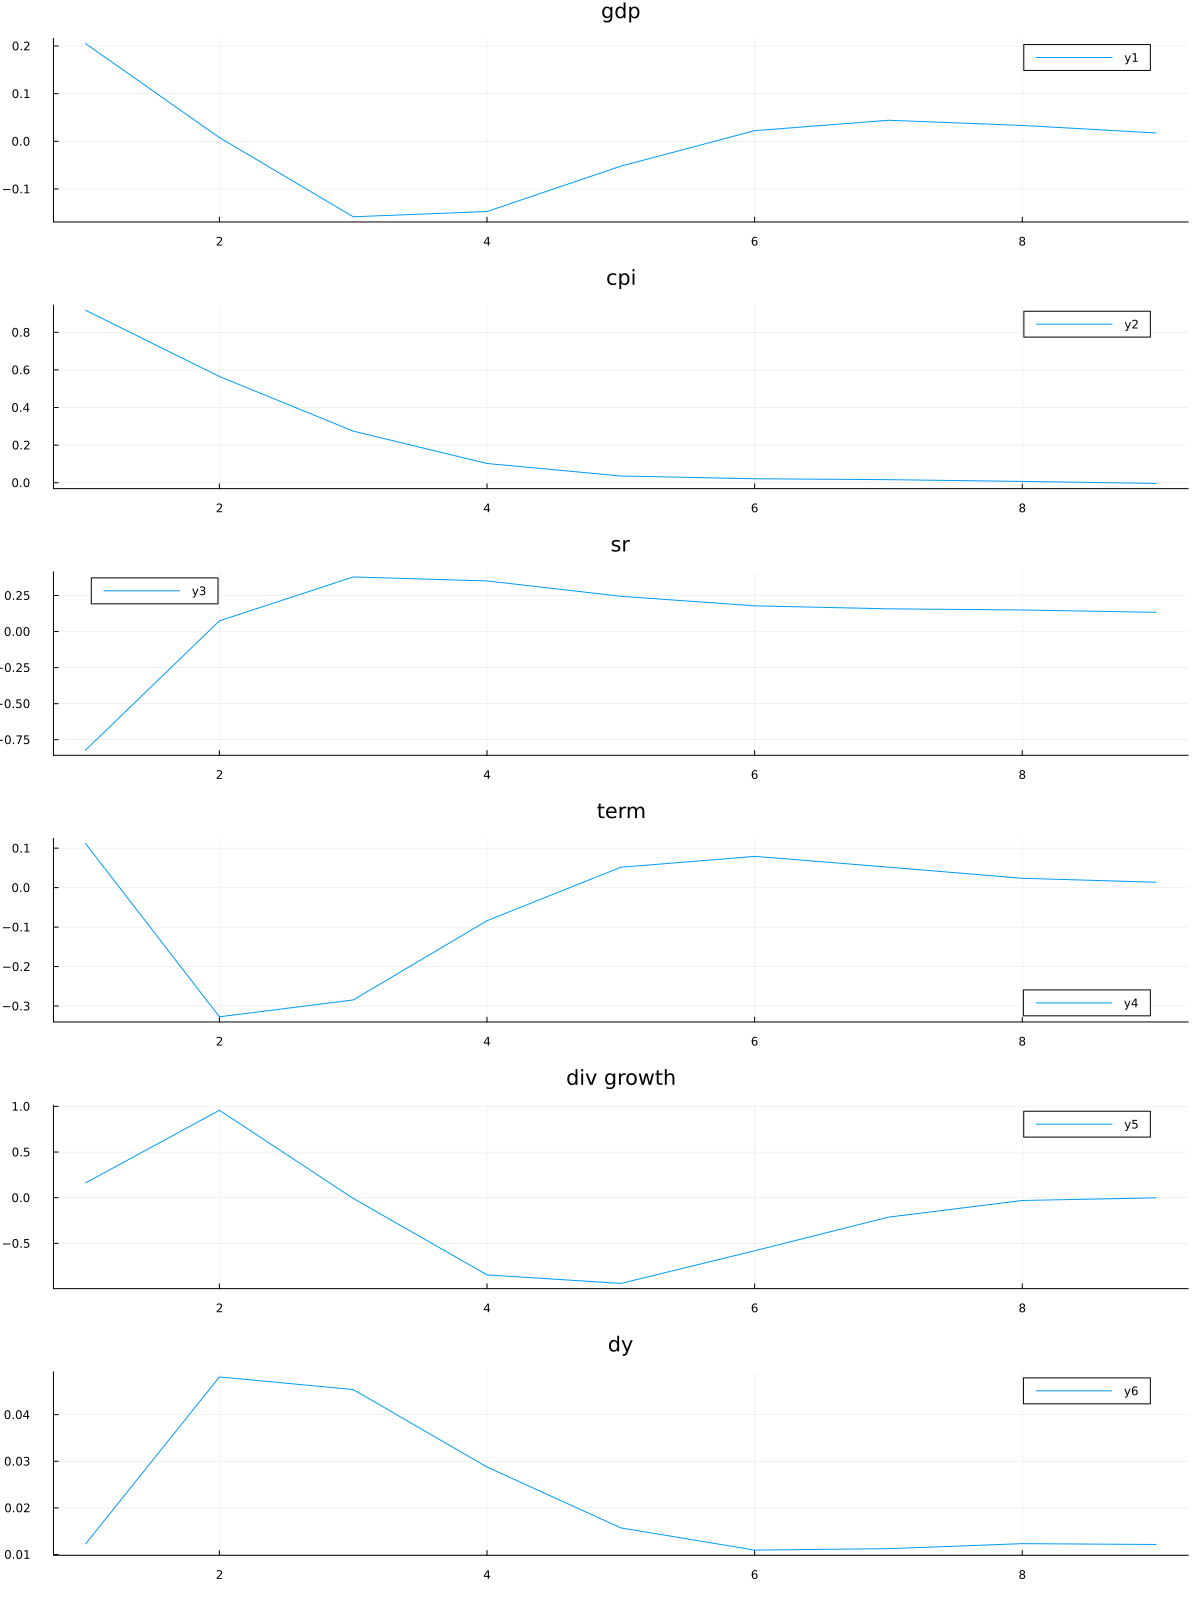

In [394]:
B = collect(model.C[2:end,:]')

resp = girf(B, model.Σ, 8, 2)

plot(resp; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [395]:
display(exp(-3.8 ) *100) 
display(exp(-3.8 + 0.08)*100) 
display((exp(-3.8 ) - exp(-3.8 + 0.08))*100) 
display(0.0224*exp((0.06^2)-1)^.5 *100)
display(exp(-4.8 ) *100) 

2.23707718561656

2.4233967845691122

-0.1863195989525522

1.3610764116758998

0.822974704902003

IRF returns
- estimate dy, and div idnex, based on initial value, mean?
- estimate returns?
- 

In [398]:
resp

9×6 Matrix{Float64}:
  0.205032     0.917194    -0.821923    0.111532    0.162595     0.0122668
  0.00782852   0.564811     0.0743009  -0.327101    0.956952     0.0480798
 -0.158327     0.274394     0.378584   -0.284465   -0.00767694   0.0453723
 -0.147278     0.102321     0.35093    -0.0837229  -0.845007     0.0287552
 -0.0520637    0.0357694    0.244463    0.0517411  -0.938294     0.0156982
  0.0224315    0.0211694    0.178242    0.0792233  -0.580497     0.0109419
  0.0441812    0.0163233    0.157597    0.0518588  -0.212467     0.0112553
  0.0332889    0.00703865   0.149632    0.0237021  -0.0302965    0.0123253
  0.0175015   -0.00369872   0.133335    0.0136528  -0.000916989  0.0121455

In [401]:
real_Δd = resp[:,2] + resp[:,5]




9-element Vector{Float64}:
  1.0797892755465686
  1.5217628714764875
  0.2667166582250462
 -0.7426857041307111
 -0.9025246436090105
 -0.5593276034867914
 -0.19614392634112257
 -0.0232578011281097
 -0.0046157094096425395

In [ ]:
dy = exp.(scenarios[6, :,:])